In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df['Gender'] = train_df.Sex.dropna().map({'female':0,'male':1})

In [6]:
Ports = list(enumerate(np.unique(train_df['Embarked'].dropna())))

In [7]:
Ports

[(0, 'C'), (1, 'Q'), (2, 'S')]

In [8]:
Ports_key = {name:i for i, name in Ports}

In [9]:
Ports_key

{'C': 0, 'Q': 1, 'S': 2}

In [10]:
train_df.Embarked[train_df.Embarked.isnull()] = train_df.Embarked.dropna().mode().values

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
train_df.Embarked = train_df.Embarked.map(lambda x: Ports_key[x])

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1


In [13]:
median_age = train_df.Age.dropna().median()

In [14]:
median_age

28.0

In [15]:
train_df.loc[train_df.Age.isnull(), 'Age'] = median_age

In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test_df.Embarked[test_df.Embarked.isnull()] = test_df.Embarked.dropna().mode().values

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
test_df['Gender'] = test_df.Sex.map({'female':0, 'male':1})

In [19]:
len(test_df[test_df.Age.isnull()]['Age'])

86

In [20]:
median_age = test_df.Age.dropna().median()

In [21]:
median_age

27.0

In [22]:
test_df[test_df.isnull()]['Age'] = median_age

In [23]:
test_df['Embarked'] = test_df.Embarked.map(lambda x: Ports_key[x])

In [24]:
test_df[test_df.Fare.isnull()][['Fare','Embarked','Age']]

,Fare,Embarked,Age
152,NaN,2,60.5


In [25]:
test_df.Fare[(test_df.Pclass == i+1) & (test_df.Embarked == j)].dropna().mean()

NameError: name 'i' is not defined

In [26]:
price = np.zeros((3,3))
for j in range(0,3):
    for i in range(0,3):
        price[i,j] = test_df.Fare[(test_df.Pclass == i+1) & (test_df.Embarked == j)].dropna().median()

In [27]:
price

array([[ 75.24585,  90.     ,  51.67085],
       [ 15.0458 ,  11.52915,  21.     ],
       [  7.2292 ,   7.75   ,   8.05   ]])

In [28]:
for j in range(0,3):
    for i in range(0,3):
        test_df.loc[(test_df.Pclass == i+1) & (test_df.Embarked == j) & (test_df.Fare.isnull()), 'Fare'] = price[j,i]

In [29]:
test_df[test_df.index == 152]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,2,1


In [30]:
train_df[train_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender


In [31]:
print price
print price[0,0]
print price[0,1]
print price[0,2]

[[ 75.24585  90.       51.67085]
 [ 15.0458   11.52915  21.     ]
 [  7.2292    7.75      8.05   ]]
75.24585
90.0
51.67085


In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1


In [33]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [35]:
text = 'Suck ma pajamas, Mr. Jobe'

In [36]:
text.split(',')[1].split('.')[0].strip()

'Mr'

In [37]:
titles = sorted(set([x for x in train_df.Name.map(lambda x: get_title(x))]))

In [38]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt','Col','Don','Jonkheer','Major','Rev','Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    

In [39]:
train_df['Title'] = train_df.Name.map(lambda x: get_title(x))

In [40]:
train_df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

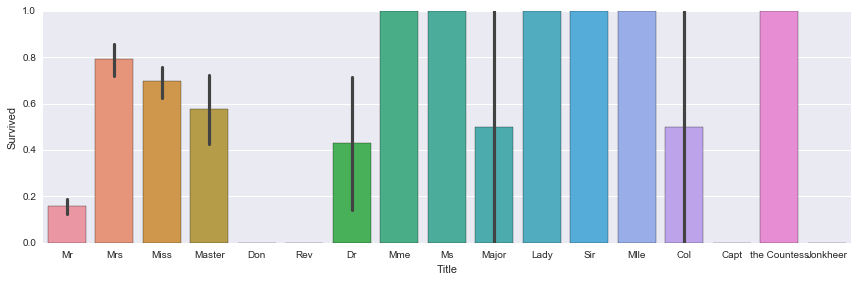

In [41]:
sns.factorplot(x='Title', y='Survived', kind='bar',data=train_df, size=4, aspect=3)

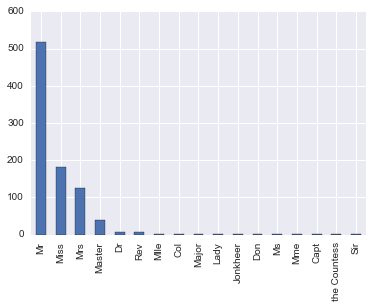

In [42]:
train_df.Title.value_counts().plot(kind='bar')

In [43]:
train_df['Title'] = train_df.apply(replace_titles, axis=1)

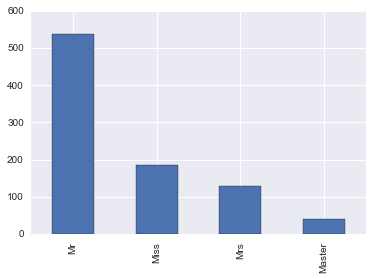

In [44]:
train_df.Title.value_counts().plot(kind='bar')

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1,Mr


In [46]:
train_df['Title'].value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64

In [47]:
train_df['Title'] = train_df.Title.dropna().map({'Mr':1, 'Miss':2, 'Master':3, 'Mrs':0})

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1,1


In [49]:
train_df[(train_df.Title.isnull()) & (train_df.Gender == 1)]['Title'] = 1

In [50]:
train_df[(train_df.Title.isnull()) & (train_df.Gender == 0)]['Title'] = 0

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,1,1


In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,0


In [54]:
train_df = train_df.drop(['PassengerId','Name','Sex','Ticket','Cabin'], axis=1)

In [56]:
ids = test_df.PassengerId.values

In [67]:
import csv as csv
from sklearn.ensemble import RandomForestClassifier

In [60]:
test_df = test_df.drop(['PassengerId','Name','Sex','Ticket','Cabin'], axis=1)

In [62]:
train_data = train_df.values

In [64]:
test_data = test_df.values

In [68]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(train_data[0::,1::], train_data[0::,0])

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
Gender      418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [72]:
test_df.Age[test_df.Age.isnull()] = median_age

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
Gender      418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [74]:
test_data = test_df.values

In [75]:
output = forest.predict(test_data).astype(int)

ValueError: Number of features of the model must  match the input. Model n_features is 8 and  input n_features is 7 

In [76]:
train_df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Title
0,0,3,22.0,1,0,7.25,2,1,1


In [77]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,2,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,2,1
4,3,22.0,1,1,12.2875,2,0
